## Importing Packages

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
import seaborn as sns
sns.set()
sns.set(style='whitegrid')

## Performance Comparison with Augmentation

In [34]:
def plot_graph(data, title):
    # Extracting triples and their corresponding types
    data['Number_of_Triples'] = data['Triples'].apply(lambda x: int(x.split('_')[0]))
    data = data.sort_values(by = 'Number_of_Triples')
    data['Type'] = data['Triples'].apply(lambda x: x.split('_')[1])

    # Plotting
    plt.figure(figsize=(10, 6))

    for label, group in data.groupby('Type'):
        plt.plot(group['Number_of_Triples'], group['test_MRR'], marker='o', label=label)

    plt.xlabel('Number of Triples Added')
    plt.ylabel('Test MRR')
    plt.title(title)
    plt.legend()
    
    # Increasing precision of the y-axis labels
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', prune='lower'))
    
    plt.show()

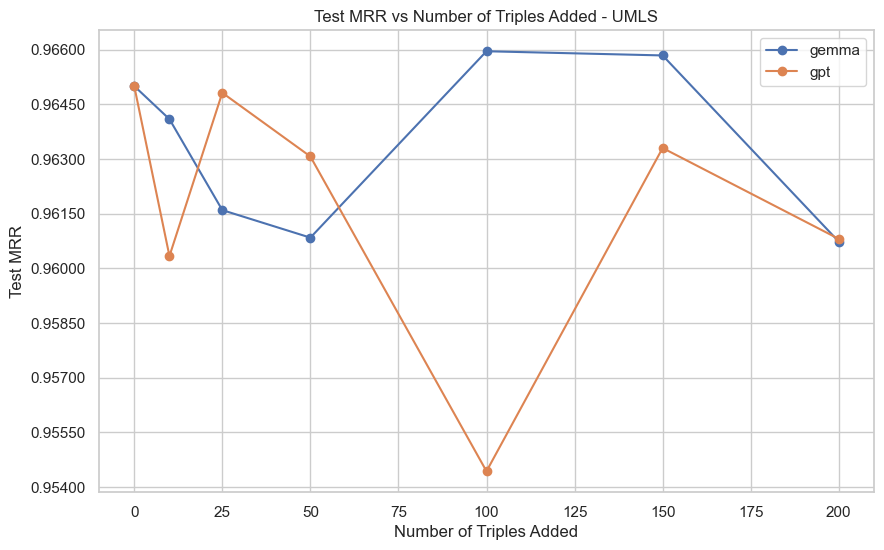

In [35]:
umls = pd.read_csv('outputs/metrics/umls.csv')
title = 'Test MRR vs Number of Triples Added - UMLS'
plot_graph(umls, title)

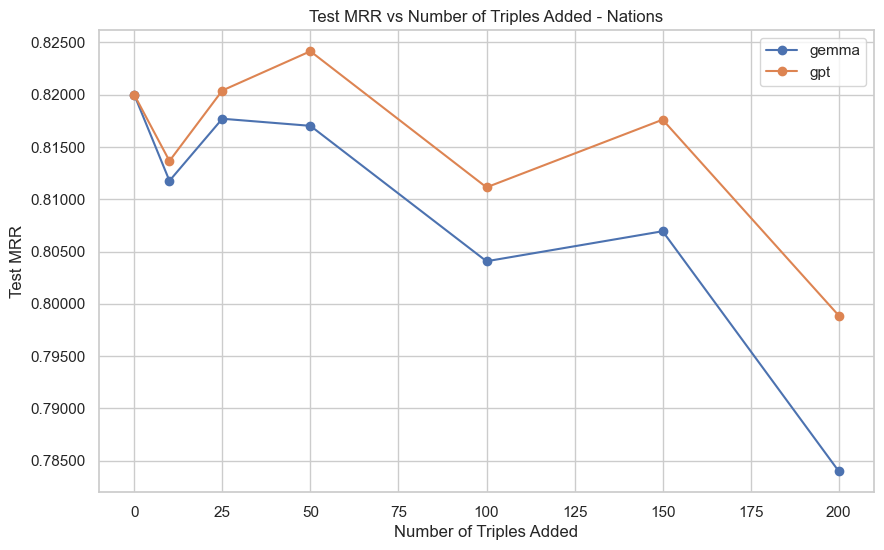

In [36]:
nations = pd.read_csv('outputs/metrics/nations.csv')
title = 'Test MRR vs Number of Triples Added - Nations'
plot_graph(nations, title)

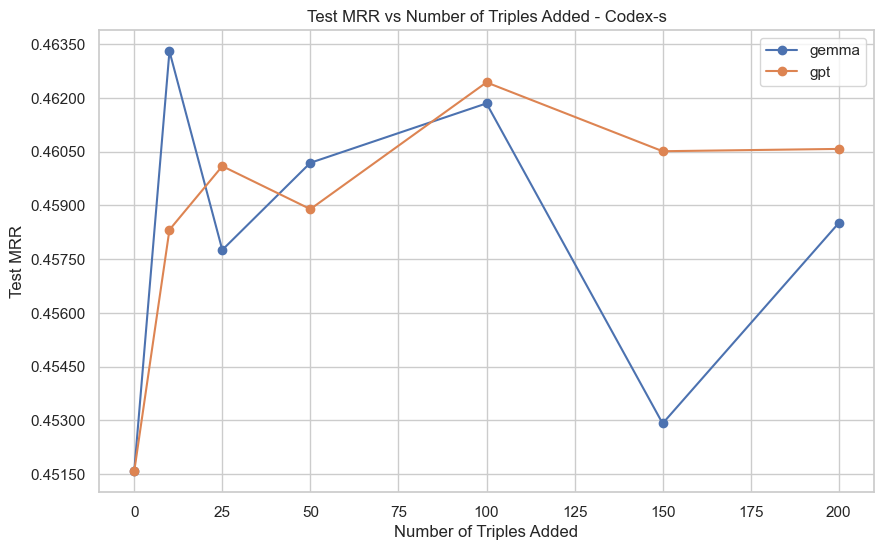

In [37]:
codexs = pd.read_csv('outputs/metrics/codex-s.csv')
title = 'Test MRR vs Number of Triples Added - Codex-s'
plot_graph(codexs, title)

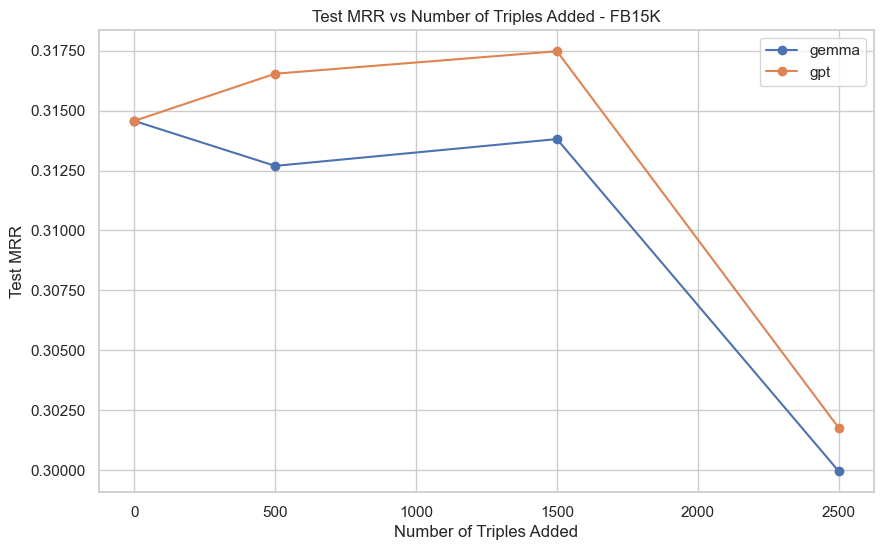

In [38]:
fb15k = pd.read_csv('outputs/metrics/fb15k.csv')
title = 'Test MRR vs Number of Triples Added - FB15K'
plot_graph(fb15k, title)

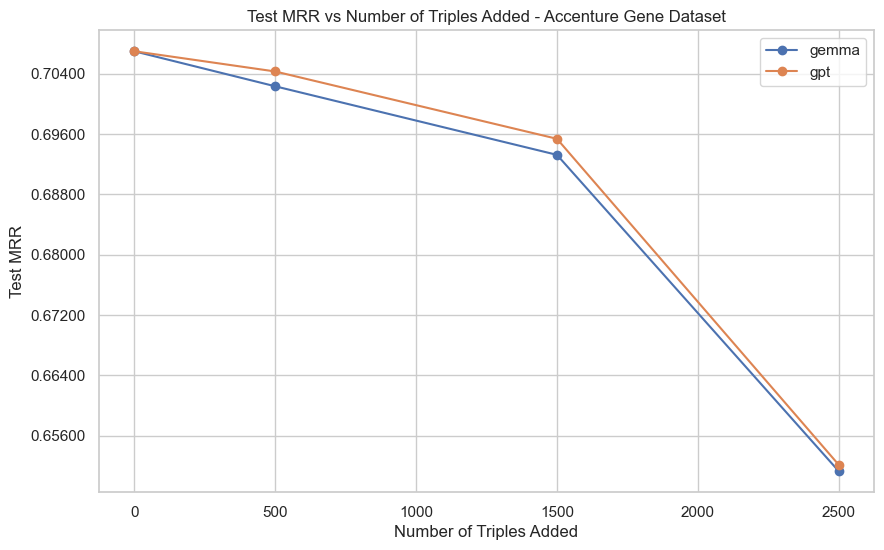

In [39]:
gene = pd.read_csv('outputs/metrics/gene.csv')
title = 'Test MRR vs Number of Triples Added - Accenture Gene Dataset'
plot_graph(gene, title)

## Triple Quality Evaluation

In [61]:
def qual(categories, values, name):
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    
    # Convert to donut
    centre_circle = plt.Circle((0, 0), 0.75, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Place text in the middle
    plt.text(0, 0, name, horizontalalignment='center', 
         verticalalignment='center', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()

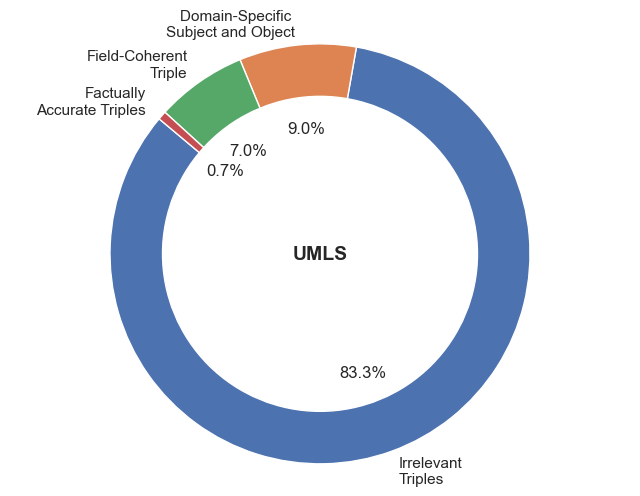

In [62]:
categories = ['Irrelevant\nTriples', 'Domain-Specific \nSubject and Object', 
              'Field-Coherent\nTriple', 'Factually\nAccurate Triples']
values = [250, 27, 21, 2]  # Example values for each category
qual(categories, values, 'UMLS')

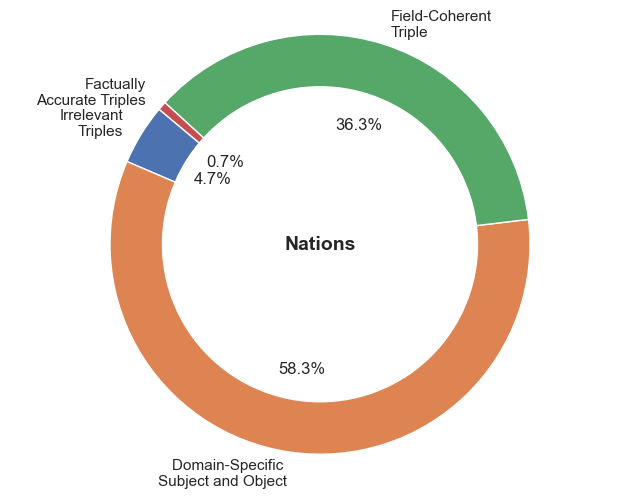

In [63]:
categories = ['Irrelevant\nTriples', 'Domain-Specific \nSubject and Object', 
              'Field-Coherent\nTriple', 'Factually\nAccurate Triples']
values = [14, 175, 109, 2]  # Example values for each category
qual(categories, values, 'Nations')

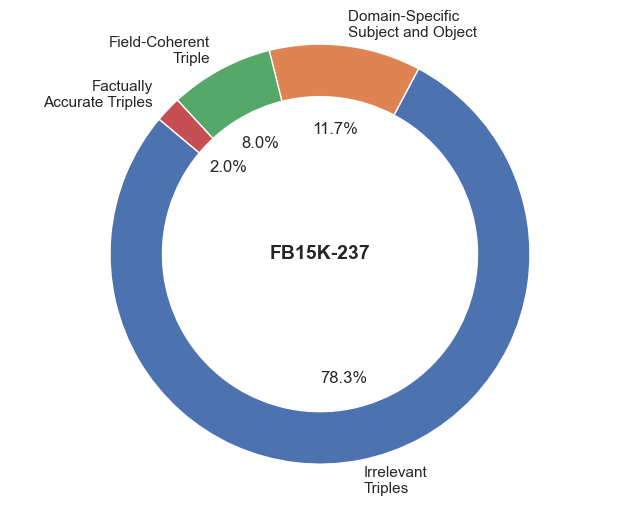

In [64]:
categories = ['Irrelevant\nTriples', 'Domain-Specific \nSubject and Object', 
              'Field-Coherent\nTriple', 'Factually\nAccurate Triples']
values = [235, 35, 24, 6]  # Example values for each category
qual(categories, values, 'FB15K-237')

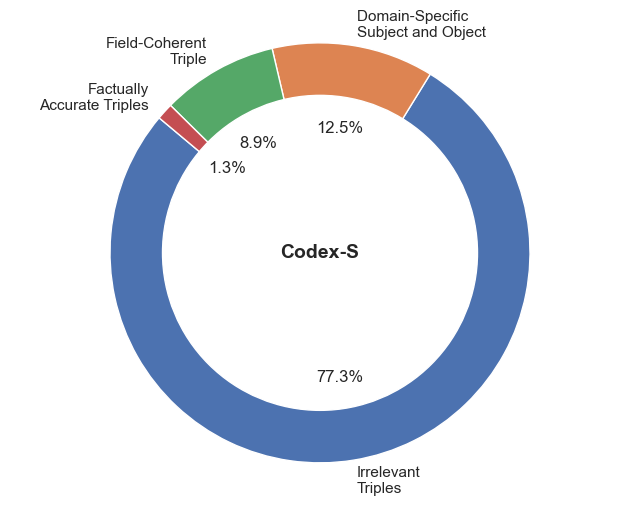

In [66]:
categories = ['Irrelevant\nTriples', 'Domain-Specific \nSubject and Object', 
              'Field-Coherent\nTriple', 'Factually\nAccurate Triples']
values = [242, 39, 28, 4]  # Example values for each category
qual(categories, values, 'Codex-S')